In [8]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
df.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X = df.drop('Class label', axis=1)
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
Y = df['Class label']
Y.head() # 因為還沒有shuffle, Y的類別是照順序排的～ 1, 2, 3 共三類

0    1
1    1
2    1
3    1
4    1
Name: Class label, dtype: int64

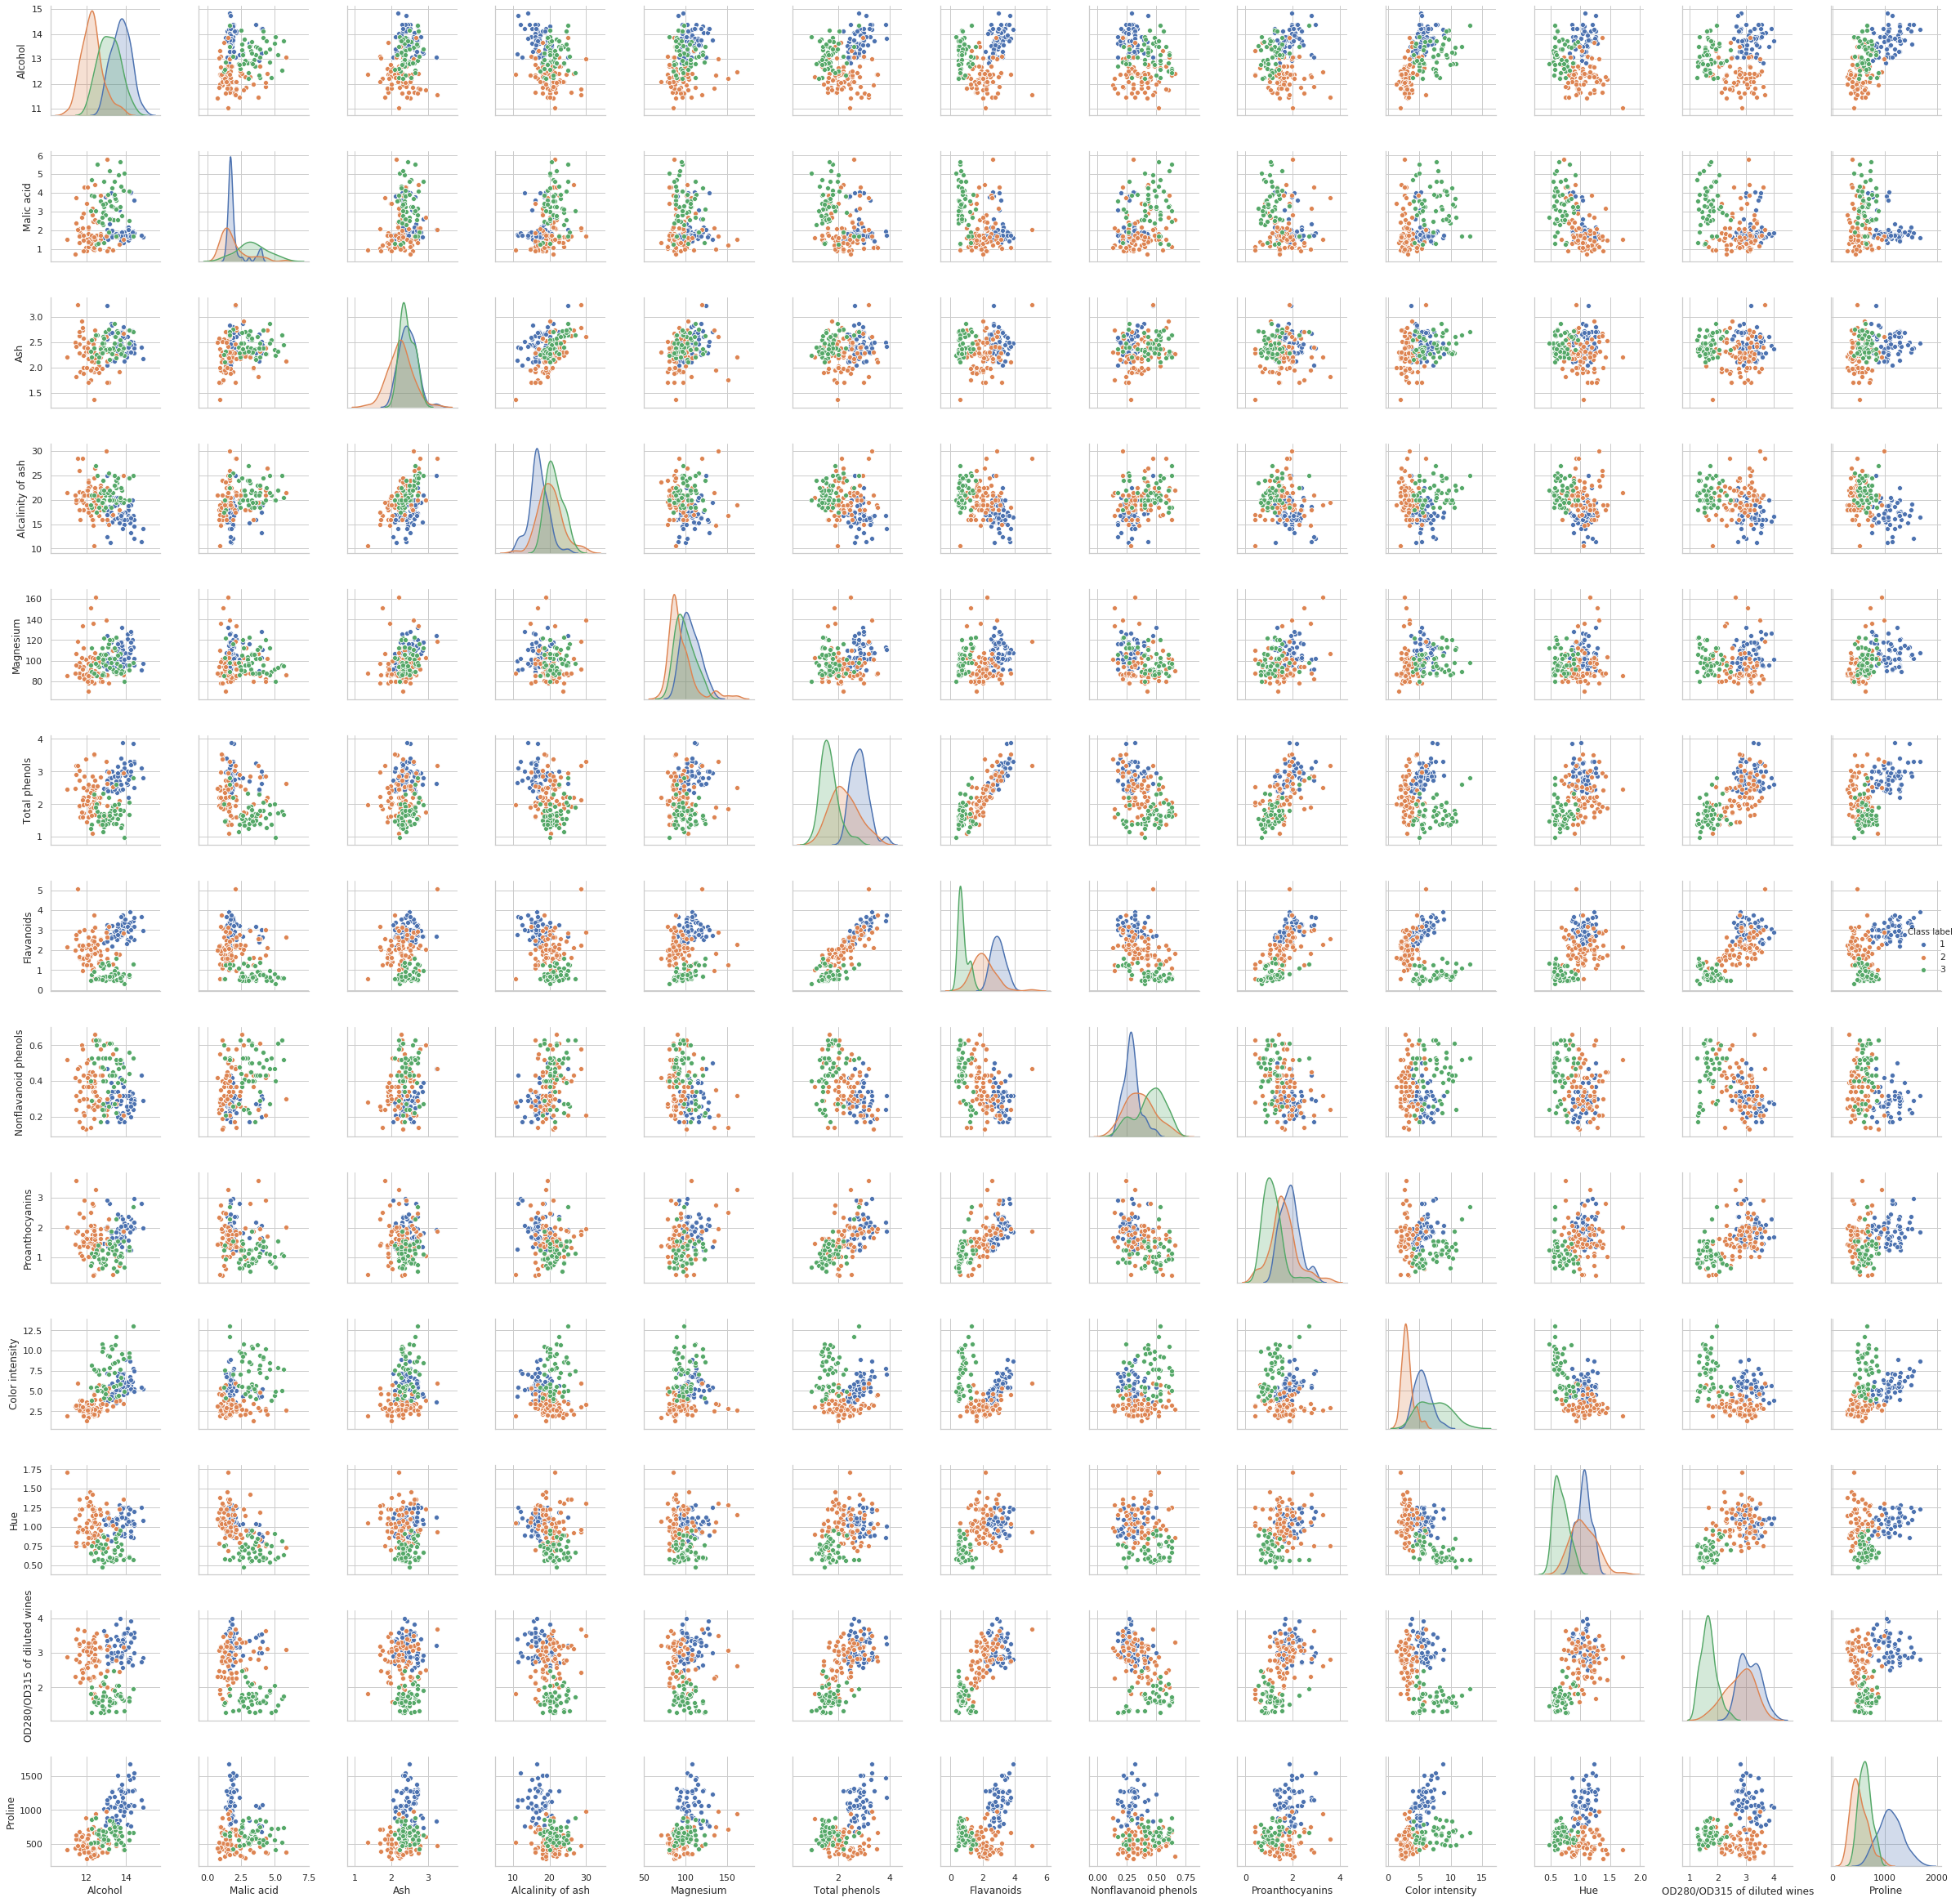

In [13]:
sns.set(style='whitegrid', context='notebook')
# hue: 色調
sns.pairplot(df, vars = df.columns[1:], hue = 'Class label', height = 2.5)
plt.tight_layout()

if not os.path.exists('./output'):
    os.mkdir('./output')

plt.savefig('./output/fig-wine-scatter.png', dpi = 300)
plt.show()

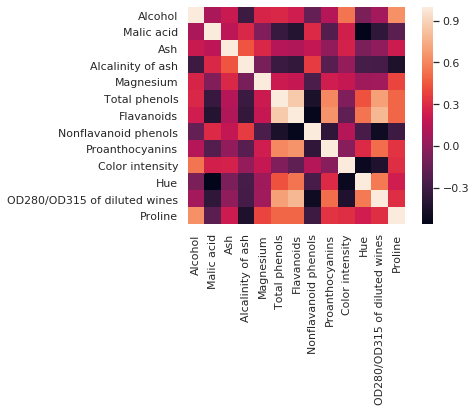

/home/eli/.conda/envs/ml/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/eli/.conda/envs/ml/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/eli/.conda/envs/ml/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/eli/.conda/envs/ml/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/eli/.conda/envs/ml/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecatio

In [14]:
sc = StandardScaler()
Z = sc.fit_transform(X)
R = np.dot(Z.T, Z) / df.shape[0]
sns.set(font_scale=1.0)
ticketlabels = [s for s in X.columns]

hm = sns.heatmap(
    R,
    cbar = True,
    square = True,
    yticklabels=ticketlabels,
    xticklabels=ticketlabels
)

# plt.tight_layout()
plt.savefig('./output/fig-wine-corr.png', dpi = 300)
plt.show()

# it will raise MatplotlibDeprecationWarning, 
# But it's ok. https://github.com/mwaskom/seaborn/issues/1642
sns.reset_orig()

In [15]:
R_ = np.corrcoef(X.T)
R_Z = np.corrcoef(Z.T)
# 即便是用 np.corrcoef 計算出來的結果, R_Z 算出來的接近度還是更高一點
print(np.sum(R_ == R))
print(np.sum(R_Z == R))

11
32


In [16]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)  # eigen_vals would be a np.array
print("Eigenvalues:\n", eigen_vals)

Eigenvalues:
 [0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


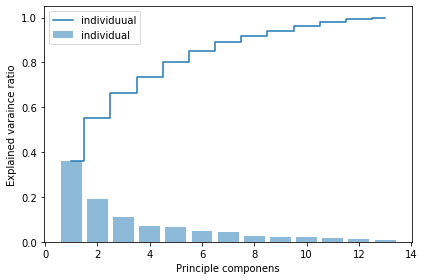

In [17]:
#  variance explained ratio
tot = sum(np.abs(eigen_vals))
var_exp = [(i/tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# alpha 代表透明值, where=mid 在調整 step function 的位置
plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, label='individual', align='center')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, label='individuual', where='mid')
plt.ylabel('Explained varaince ratio')
plt.xlabel('Principle componens')
plt.legend(loc='best')  # legend 圖例的意思
plt.tight_layout()
plt.show()

In [18]:
# 我們會以為 eigen_vecs[i] 是對應到 eigen_val 的 eigen_vec 但是，其實不是
# 對應的vector是： eigen_vec[:, i]
# eigen_pairs is a python list
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]


# 如果要直接 specify 取哪一個feature當作排序單位:
# from operator import itemgetter
# eigen_pairs.sort(key=itemgetter(0), reverse=True)
eigen_pairs.sort(reverse=True)

In [19]:
print("The first priciple component:\n", eigen_pairs[0][1][:,])
print("\nshape of eigen_pairs[0][1][:,]:\n", eigen_pairs[0][1][:,].shape)

The first priciple component:
 [-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
 -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
 -0.28675223]

shape of eigen_pairs[0][1][:,]:
 (13,)


In [20]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.1443294 ],
       [ 0.24518758],
       [ 0.00205106],
       [ 0.23932041],
       [-0.14199204],
       [-0.39466085],
       [-0.4229343 ],
       [ 0.2985331 ],
       [-0.31342949],
       [ 0.0886167 ],
       [-0.29671456],
       [-0.37616741],
       [-0.28675223]])

In [21]:
# np.hstack is a function to stack columns vector(h:horizontally)
# 老師的筆記上：W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
#                eigen_pairs[1][1][:, np.newaxis]))
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print("Projection Matrix:\n", W)
print("\nThe shape of stacked vector:\n", W.shape)

Projection Matrix:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]

The shape of stacked vector:
 (13, 2)


In [22]:
Z_pca = Z.dot(W)
print("Top 5 of Z_pca:\n", Z_pca[:5,])
print("\nThe shape of Z_pca:\n", Z_pca.shape)

Top 5 of Z_pca:
 [[-3.31675081  1.44346263]
 [-2.20946492 -0.33339289]
 [-2.51674015  1.0311513 ]
 [-3.75706561  2.75637191]
 [-1.00890849  0.86983082]]

The shape of Z_pca:
 (178, 2)


Unique Class Labels:
 [1 2 3]


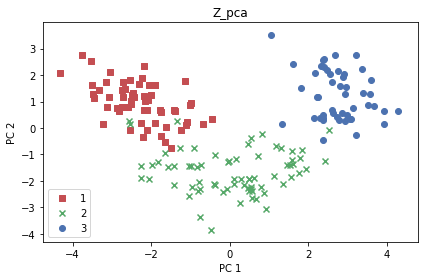

In [23]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
# 分成三類來畫出來

print("Unique Class Labels:\n", np.unique(Y.values))
for l, c, m in zip(np.unique(Y.values), colors, markers):
    # 因為 np.unique(Y.values) 會區分出三個類別, return: [1, 2, 3]
    # 所以在 for loop iterative 的時候，先針對第一個axis去比對他們的類別
    # 然後，針對他們的類別取到 The 0-th element, 1-st element.
    plt.scatter(Z_pca[Y.values==l, 0],
                Z_pca[Y.values==l, 1],
                c=c, label=l, marker=m)

plt.title("Z_pca")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

## The following is assignment for visualizating 3D-PCA 

In [28]:
df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop('Class label', axis=1)
Y_load = df_load['Class label']

df_load.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


In [31]:
# preprocessing by z-normalization
sc = StandardScaler()
Z = sc.fit_transform(X_load)
R = np.dot(Z.T, Z) / df_load.shape[0]

eigen_vals, eigen_vecs = np.linalg.eigh(R)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)
W_2D = np.hstack((
    eigen_pairs[0][1][:, np.newaxis],
    eigen_pairs[1][1][:, np.newaxis],
    ))

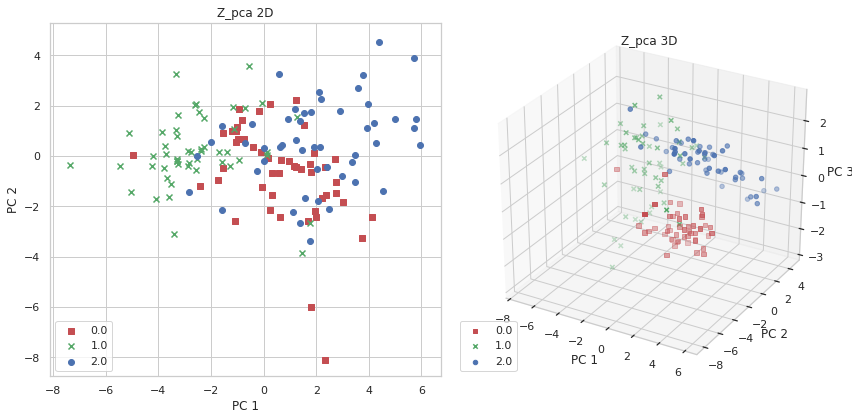

In [61]:
sns.set(style='whitegrid', context='notebook')

from mpl_toolkits.mplot3d import Axes3D

Z_pca2 = Z.dot(W_2D)

# plot settnigs
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12, 6))

# plot 2D
# fig.add_subplot(nrows, ncols, index)
# param:
# - nrows: 這個圖共有幾個row
# - ncols: 這個圖共有幾個col
# - index: 這個圖的所在位置
plt2 = fig.add_subplot(1, 2, 1)
for l, c, m in zip(np.unique(Y_load.values), colors, markers):
    plt.scatter(Z_pca2[Y_load.values==l, 0],
               Z_pca2[Y_load.values==l, 1],
                c=c, label=l, marker=m
               )

plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

# plot 3D
plt3 = fig.add_subplot(1, 2, 2, projection='3d')


W_3D = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(3)])
Z_pca3 = Z.dot(W_3D)

for l, c, m in zip(np.unique(Y_load.values), colors, markers):
    plt3.scatter(Z_pca3[Y_load.values==l, 0],
               Z_pca3[Y_load.values==l, 1],
               Z_pca3[Y_load.values==l, 2],
               c=c, label=l, marker=m)
    
plt.title('Z_pca 3D')
plt3.set_xlabel('PC 1')
plt3.set_ylabel('PC 2')
plt3.set_zlabel('PC 3')
plt.legend(loc='lower left')
plt.tight_layout()

if not os.path.exists('./output'):
    os.makedirs('./output')
    
plt.savefig('./output/pca-3d.png', dpi=300)
plt.show()